In [3]:
def get_vo_ov(file):
    vo = 0
    ov = 0
    for fi in file.readlines():
        t = fi.split('\t')
        if 'obj' in t:
            if t[0] >  t[6]:
                vo = vo + 1
            if t[6] > t[0]:
                ov = ov + 1

    if float(ov) <  float(vo):
        ov = float(ov) / float(vo)
        vo = 1-(float(ov) / float(vo))
    else:
        vo = float(vo) / float(ov)
        ov = 1-(float(vo) / float(ov))
        
    return ov,vo

In [4]:
files = ['es_pud-ud-test','zh_pud-ud-test','ru_taiga-ud-train','en_atis-ud-train','he_htb-ud-train','id_csui-ud-train','it_isdt-ud-train','ja_modern-ud-test','pl_pdb-ud-train','sa_vedic-ud-train']
langs = ['spanish','chinese','russian','english','hebrew','indonesian','italian','japanese','portugese','sanskrit']
labels = {}
x = []
y = []
for i in range(len(langs)):
    labels[i] = langs[i][0:3]
idx = 0
for f in files:
    temp = open(f+'.conllu','r',encoding="utf-8")
    ov,vo = get_vo_ov(temp)
    print(langs[idx] +' '+'OV :'+ str(ov),'VO :'+ str(vo))
    x.append(ov)
    y.append(vo)
    idx = idx + 1
    

spanish OV :0.19667170953101362 VO :0.9997024633743857
chinese OV :0.21690590111642744 VO :0.9998270287869885
russian OV :0.4940758293838863 VO :0.9998829204195773
english OV :0.05014152850788516 VO :0.9999797244122491
hebrew OV :0.15156734412676542 VO :0.9999477894095327
indonesian OV :0.08412698412698413 VO :0.9998664651045603
italian OV :0.2464205963483515 VO :0.9999676316043152
japanese OV :0.9998269164787766 VO :0.13985148514851486
portugese OV :0.2975661375661376 VO :0.9999685115198342
sanskrit OV :0.9997338130279271 VO :0.2909423604757548


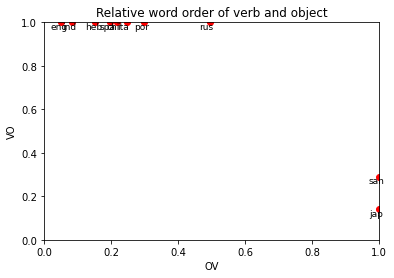

In [5]:
import matplotlib.pyplot as plt

 # proportion of VO
plt.plot(x, y, 'ro')
plt.title('Relative word order of verb and object')
plt.xlim([0,1]) # Set the x and y axis ranges
plt.ylim([0,1])
plt.xlabel('OV') # Set the x and y axis labels
plt.ylabel('VO')
for i in labels:  # Add labels to each of the points
    plt.text(x[i]-0.03, y[i]-0.03, labels[i], fontsize=9)

plt.show()